# Credit Risk Modelling - Loan Classification

------------------------------------------------------------------------------------------------------------------------------------------

In this project, I will do the following:

* Import a dataset containing information about clients applying for loans
* Analyse the data of all the loan applicants using graphs
* Make machine learning models using various algorithms to classify if the client will repay the loan on time or not
* Analyse and compare the results given by the various algorithms
* Evaluate the models to find out their performances
  

------------------------------------------------------------------------------------------------------------------------------------------

## The Dataset:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
data = pd.read_csv("loan_detection.csv")

In [3]:
data

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,Loan_Status_label
0,56,1,999,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
1,57,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,37,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,40,1,999,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,56,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,1,999,0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
41184,46,1,999,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
41185,56,2,999,0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
41186,44,1,999,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 60 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   age                            41188 non-null  int64
 1   campaign                       41188 non-null  int64
 2   pdays                          41188 non-null  int64
 3   previous                       41188 non-null  int64
 4   no_previous_contact            41188 non-null  int64
 5   not_working                    41188 non-null  int64
 6   job_admin.                     41188 non-null  int64
 7   job_blue-collar                41188 non-null  int64
 8   job_entrepreneur               41188 non-null  int64
 9   job_housemaid                  41188 non-null  int64
 10  job_management                 41188 non-null  int64
 11  job_retired                    41188 non-null  int64
 12  job_self-employed              41188 non-null  int64
 13  job_services    

What I get of this data? (About all of the columns):
* Age - Age of the client(May be significant because an old-age client might not be able to repay the loan)
* Campaign - Probably the number of times the client was contacted for the loan during this campaign (May be significant)
* pdays - Number of days a client was contacted before agreeing to the loan.
* previous - Number of contacts made with the client in the previous campaigns, no_previous_contact - 1/0 depending on this.
* not_working - 1 for the client working, 0 for not working. (Very Significant)
* job_admin, ...... , job_unknown - Job types of the client. (Significant)
* marital_divorced, .... , marital_unknown - Marital status of the client.
* education_basic.4y, .... , education_unknown - Education status of the client.
* default_no, default_yes, default_unknown - Default status of the client. (Significant)
* housing_no, housing_yes, housing_unknown - Housing loan status of the client (Significant - Along with a housing loan, it is difficult)
* loan_no, loan_yes, loan_unknown - If the client has an outstanding loan (Very significant)
* contact_cellular, contact_telephone - NOT SIGNIFICANT (I will omit this)
* month_apr, .... , month_sep - Months of last contact (Not Significant)
* day_of_week_fri, ..... , day_of_week_wed - Days of last contact (Not Significant)
* poutcome_failure, .... , poutcome_success - Data on response of the client in previous campaigns (Likely Significant)

  Finally, Loan_Status_label is the dependent variable - the final outcome if the loan was approved for the client or not.

In [5]:
data.isna().count()

age                              41188
campaign                         41188
pdays                            41188
previous                         41188
no_previous_contact              41188
not_working                      41188
job_admin.                       41188
job_blue-collar                  41188
job_entrepreneur                 41188
job_housemaid                    41188
job_management                   41188
job_retired                      41188
job_self-employed                41188
job_services                     41188
job_student                      41188
job_technician                   41188
job_unemployed                   41188
job_unknown                      41188
marital_divorced                 41188
marital_married                  41188
marital_single                   41188
marital_unknown                  41188
education_basic.4y               41188
education_basic.6y               41188
education_basic.9y               41188
education_high.school    

- So, there are no missing values to be fixed.

In [6]:
data['Loan_Status_label'].value_counts()

Loan_Status_label
0    36548
1     4640
Name: count, dtype: int64

- So, here we can see that the data has more negative outcomes (0s) than positive outcomes - loan approvals(1s) and we will have to normalize this data before making our model.
- THE DATA IS IMBALANCED

------------------------------------------------------------------------------------------------------------------------------------------

## Analysis of the data:

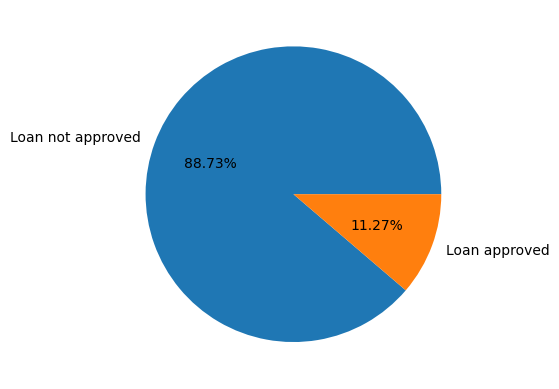

In [7]:
plt.pie(data['Loan_Status_label'].value_counts(),labels=['Loan not approved','Loan approved'],autopct="%1.2f%%")
plt.show()

- The data is completely imbalanced.

In [8]:
job=[]
for i in range(len(data)):
    if data['job_admin.'][i]== 1:
        job.append('Admin')
    if data['job_blue-collar'][i] == 1:
        job.append('Blue-collar')
    if data['job_entrepreneur'][i] == 1:
        job.append('Entrepreneur')
    if data['job_housemaid'][i] == 1:
        job.append('Housemaid')
    if data['job_management'][i] == 1:
        job.append('Management')
    if data['job_retired'][i] == 1:
        job.append('Retired')
    if data['job_self-employed'][i] == 1:
        job.append('Self-employed')
    if data['job_services'][i] == 1:
        job.append('Services')
    if data['job_student'][i] == 1:
        job.append('Student')
    if data['job_technician'][i] == 1:
        job.append('Technician')
    if data['job_unemployed'][i] == 1:
        job.append('Unemployed')
    if data['job_unknown'][i] == 1:
        job.append('Unknown')
len(job)

41188

In [9]:
data['job']=job

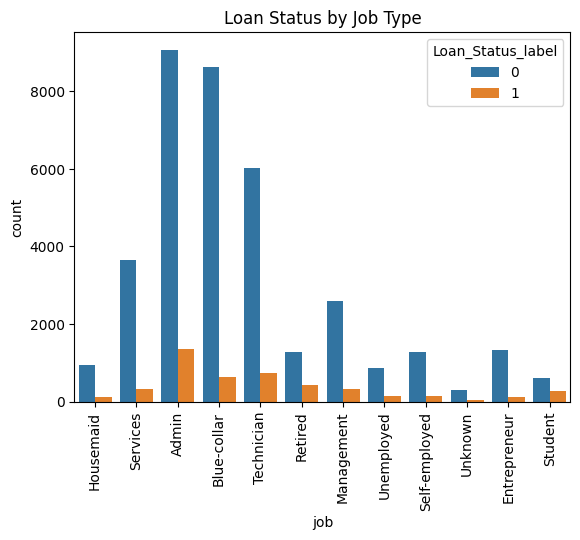

In [10]:
sb.countplot(data=data, x='job', hue='Loan_Status_label')
plt.xticks(rotation=90)
plt.title('Loan Status by Job Type')
plt.show()

- Here we can see: unstable income jobs like housemaid, New Entrepreneur or Unemployed/unknown/self-employed job clients have less chances of getting the loan approved, so jobs are significant in this data.

In [11]:
marital=[]
for i in range(len(data)):
    if data['marital_divorced'][i]== 1:
        marital.append('Divorced')
    if data['marital_married'][i] == 1:
        marital.append('Married')
    if data['marital_single'][i] == 1:
        marital.append('Single')
    if data['marital_unknown'][i] == 1:
        marital.append('Unknown')
len(marital)

41188

In [12]:
data['Marital_status']=marital

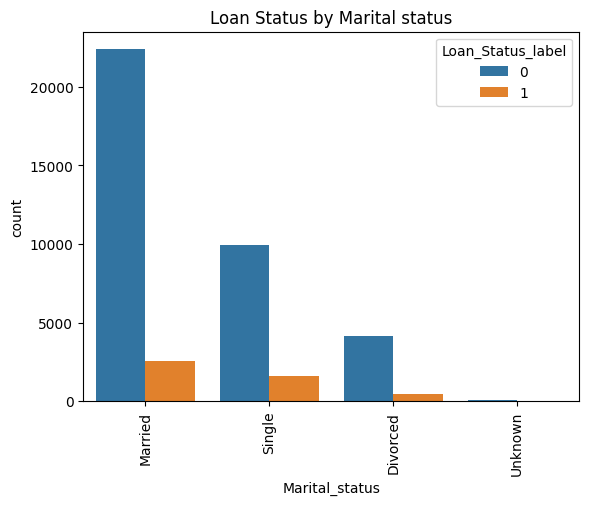

In [13]:
sb.countplot(data=data, x='Marital_status', hue='Loan_Status_label')
plt.xticks(rotation=90)
plt.title('Loan Status by Marital status')
plt.show()

- Marital status does not appear to have a direct impact on the outcome but it appears that there is a higher probability of getting the loan for single clients(Though it may be a coincidence). So I will omit this detail in the classification.

In [14]:
edu=[]
for i in range(len(data)):
    if data['education_basic.4y'][i]== 1:
        edu.append('4 year Basic')
    if data['education_basic.6y'][i] == 1:
        edu.append('6 year Basic')
    if data['education_basic.9y'][i] == 1:
        edu.append('9 year Basic')
    if data['education_high.school'][i] == 1:
        edu.append('High School')
    if data['education_illiterate'][i] == 1:
        edu.append('Illiterate')
    if data['education_professional.course'][i] == 1:
        edu.append('Professional-course')
    if data['education_university.degree'][i] == 1:
        edu.append('University degree')
    if data['education_unknown'][i] == 1:
        edu.append('Unknown')
len(edu)

41188

In [15]:
data['Education_status']=edu

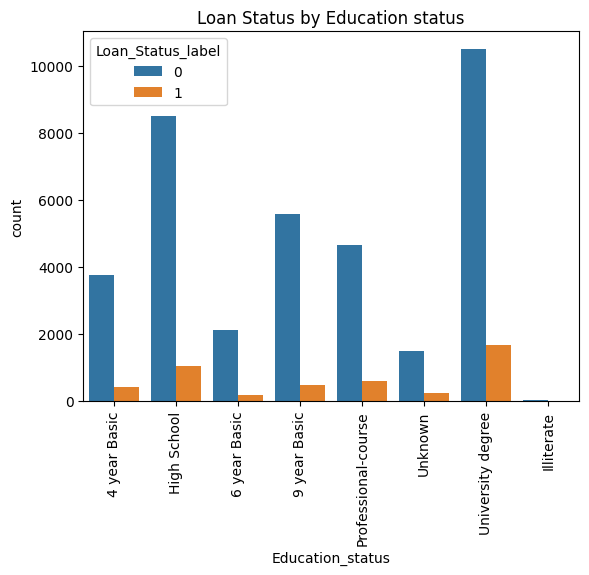

In [16]:
sb.countplot(data=data, x='Education_status', hue='Loan_Status_label')
plt.xticks(rotation=90)
plt.title('Loan Status by Education status')
plt.show()

- Here we can see that clients who have passed high school or have a university degree are more likely to get the loan. Less educated clients have a lower probability of getting their loan approved.

In [17]:
default=[]
for i in range(len(data)):
    if data['default_no'][i]== 1:
        default.append('Not a defaulter')
    if data['default_unknown'][i] == 1:
        default.append('Default unknown')
    if data['default_yes'][i] == 1:
        default.append('Defaulter')
len(default)

41188

In [18]:
data['Default']=default

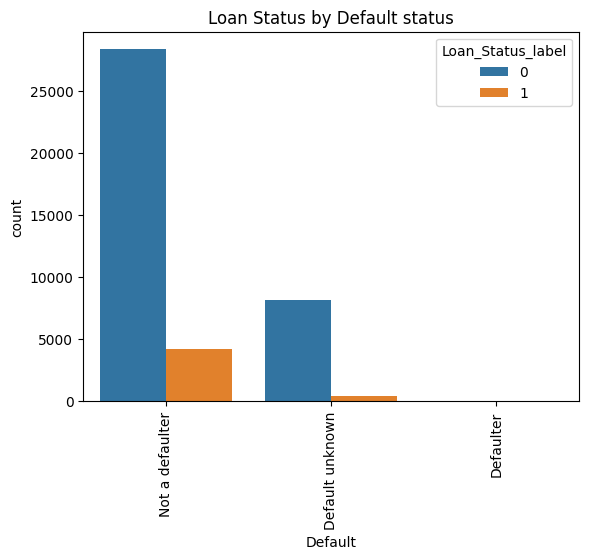

In [19]:
sb.countplot(data=data, x='Default', hue='Loan_Status_label')
plt.xticks(rotation=90)
plt.title('Loan Status by Default status')
plt.show()

- Non defaulters have a good chance of getting their loan approved.

In [20]:
housing=[]
for i in range(len(data)):
    if data['housing_no'][i]== 1:
        housing.append('No Housing loan')
    if data['housing_unknown'][i] == 1:
        housing.append('Home loan unknown')
    if data['housing_yes'][i] == 1:
        housing.append('Has Housing loan')
len(housing)

41188

In [21]:
data['Housing']=housing

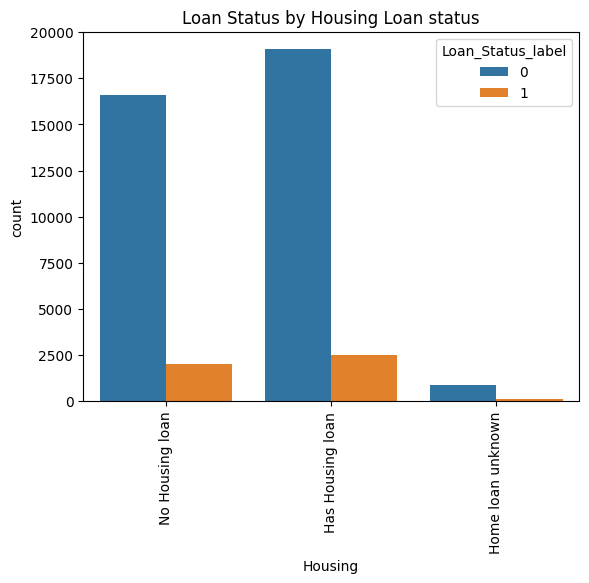

In [22]:
sb.countplot(data=data, x='Housing', hue='Loan_Status_label')
plt.xticks(rotation=90)
plt.title('Loan Status by Housing Loan status')
plt.show()

- There seems to be no difference in the outcome due to a housing loan so I will omit it.

In [23]:
loan=[]
for i in range(len(data)):
    if data['loan_no'][i]== 1:
        loan.append('No loan')
    if data['loan_unknown'][i] == 1:
        loan.append('loan unknown')
    if data['loan_yes'][i] == 1:
        loan.append('Has loan')
len(loan)

41188

In [24]:
data['Loan']=loan

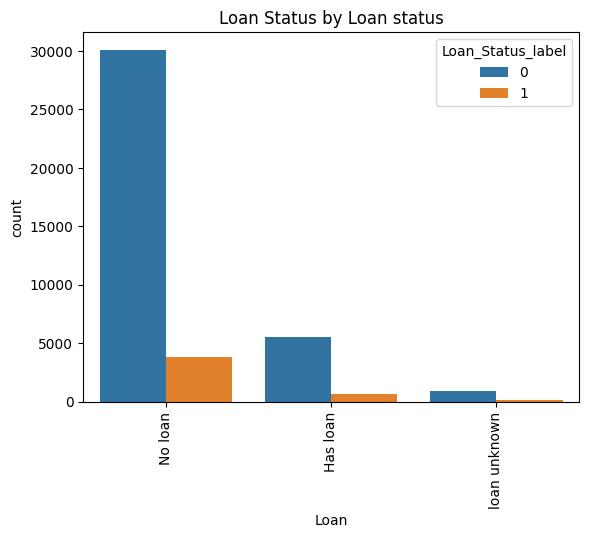

In [25]:
sb.countplot(data=data, x='Loan', hue='Loan_Status_label')
plt.xticks(rotation=90)
plt.title('Loan Status by Loan status')
plt.show()

- People without an ongoing loan have a greater chance of getting another loan approved so this data is significant.

In [26]:
poutcome=[]
for i in range(len(data)):
    if data['poutcome_failure'][i]== 1:
        poutcome.append('Negative response previously')
    if data['poutcome_nonexistent'][i] == 1:
        poutcome.append('previous response unknown')
    if data['poutcome_success'][i] == 1:
        poutcome.append('positive response previously')
len(poutcome)

41188

In [27]:
data['poutcome']=poutcome

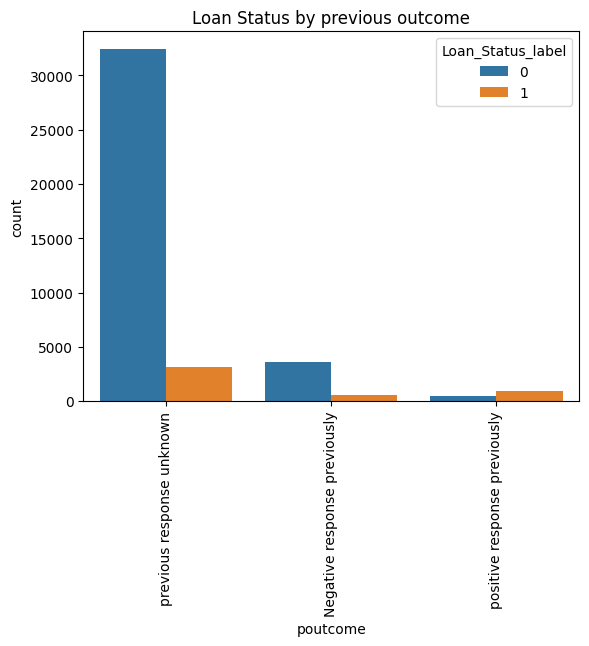

In [28]:
sb.countplot(data=data, x='poutcome', hue='Loan_Status_label')
plt.xticks(rotation=90)
plt.title('Loan Status by previous outcome')
plt.show()

- Here we can see, positive poutcome shows a very good chance of loan approval so this data is very significant.

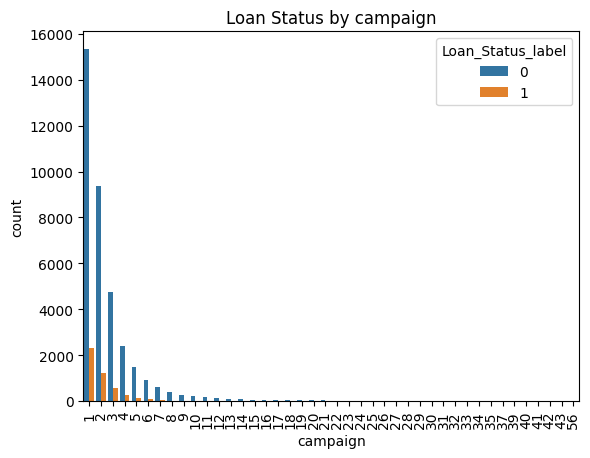

In [29]:
sb.countplot(data=data, x='campaign', hue='Loan_Status_label')
plt.xticks(rotation=90)
plt.title('Loan Status by campaign')
plt.show()

- So less number of campaigns means higher chances of loan approval and so this data is significant.

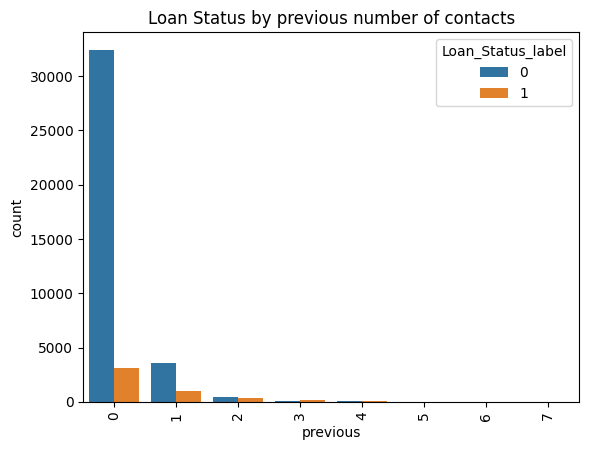

In [30]:
sb.countplot(data=data, x='previous', hue='Loan_Status_label')
plt.xticks(rotation=90)
plt.title('Loan Status by previous number of contacts')
plt.show()

- More number of contacts means the bank is ready to give a loan to the client and thus it gives higher chances of loan approval.

#### Dropping Columns:

In [31]:
data

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,poutcome_nonexistent,poutcome_success,Loan_Status_label,job,Marital_status,Education_status,Default,Housing,Loan,poutcome
0,56,1,999,0,1,0,0,0,0,1,...,1,0,0,Housemaid,Married,4 year Basic,Not a defaulter,No Housing loan,No loan,previous response unknown
1,57,1,999,0,1,0,0,0,0,0,...,1,0,0,Services,Married,High School,Default unknown,No Housing loan,No loan,previous response unknown
2,37,1,999,0,1,0,0,0,0,0,...,1,0,0,Services,Married,High School,Not a defaulter,Has Housing loan,No loan,previous response unknown
3,40,1,999,0,1,0,1,0,0,0,...,1,0,0,Admin,Married,6 year Basic,Not a defaulter,No Housing loan,No loan,previous response unknown
4,56,1,999,0,1,0,0,0,0,0,...,1,0,0,Services,Married,High School,Not a defaulter,No Housing loan,Has loan,previous response unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,1,999,0,1,1,0,0,0,0,...,1,0,1,Retired,Married,Professional-course,Not a defaulter,Has Housing loan,No loan,previous response unknown
41184,46,1,999,0,1,0,0,1,0,0,...,1,0,0,Blue-collar,Married,Professional-course,Not a defaulter,No Housing loan,No loan,previous response unknown
41185,56,2,999,0,1,1,0,0,0,0,...,1,0,0,Retired,Married,University degree,Not a defaulter,Has Housing loan,No loan,previous response unknown
41186,44,1,999,0,1,0,0,0,0,0,...,1,0,1,Technician,Married,Professional-course,Not a defaulter,No Housing loan,No loan,previous response unknown


In [32]:
fdata=data.drop(columns=['job','Marital_status','Education_status','Default','Housing','Loan','poutcome','housing_no','housing_yes','housing_unknown','marital_divorced','marital_single','marital_married','marital_unknown','day_of_week_fri','day_of_week_mon','day_of_week_tue','day_of_week_wed','day_of_week_thu','month_sep','month_oct','month_nov','month_may','month_mar','month_jun','month_jul','month_dec','month_aug','month_apr','contact_telephone','contact_cellular'])

In [33]:
fdata

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,default_no,default_unknown,default_yes,loan_no,loan_unknown,loan_yes,poutcome_failure,poutcome_nonexistent,poutcome_success,Loan_Status_label
0,56,1,999,0,1,0,0,0,0,1,...,1,0,0,1,0,0,0,1,0,0
1,57,1,999,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
2,37,1,999,0,1,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
3,40,1,999,0,1,0,1,0,0,0,...,1,0,0,1,0,0,0,1,0,0
4,56,1,999,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,1,999,0,1,1,0,0,0,0,...,1,0,0,1,0,0,0,1,0,1
41184,46,1,999,0,1,0,0,1,0,0,...,1,0,0,1,0,0,0,1,0,0
41185,56,2,999,0,1,1,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
41186,44,1,999,0,1,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,1


In [34]:
fdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 36 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   age                            41188 non-null  int64
 1   campaign                       41188 non-null  int64
 2   pdays                          41188 non-null  int64
 3   previous                       41188 non-null  int64
 4   no_previous_contact            41188 non-null  int64
 5   not_working                    41188 non-null  int64
 6   job_admin.                     41188 non-null  int64
 7   job_blue-collar                41188 non-null  int64
 8   job_entrepreneur               41188 non-null  int64
 9   job_housemaid                  41188 non-null  int64
 10  job_management                 41188 non-null  int64
 11  job_retired                    41188 non-null  int64
 12  job_self-employed              41188 non-null  int64
 13  job_services    

<Axes: >

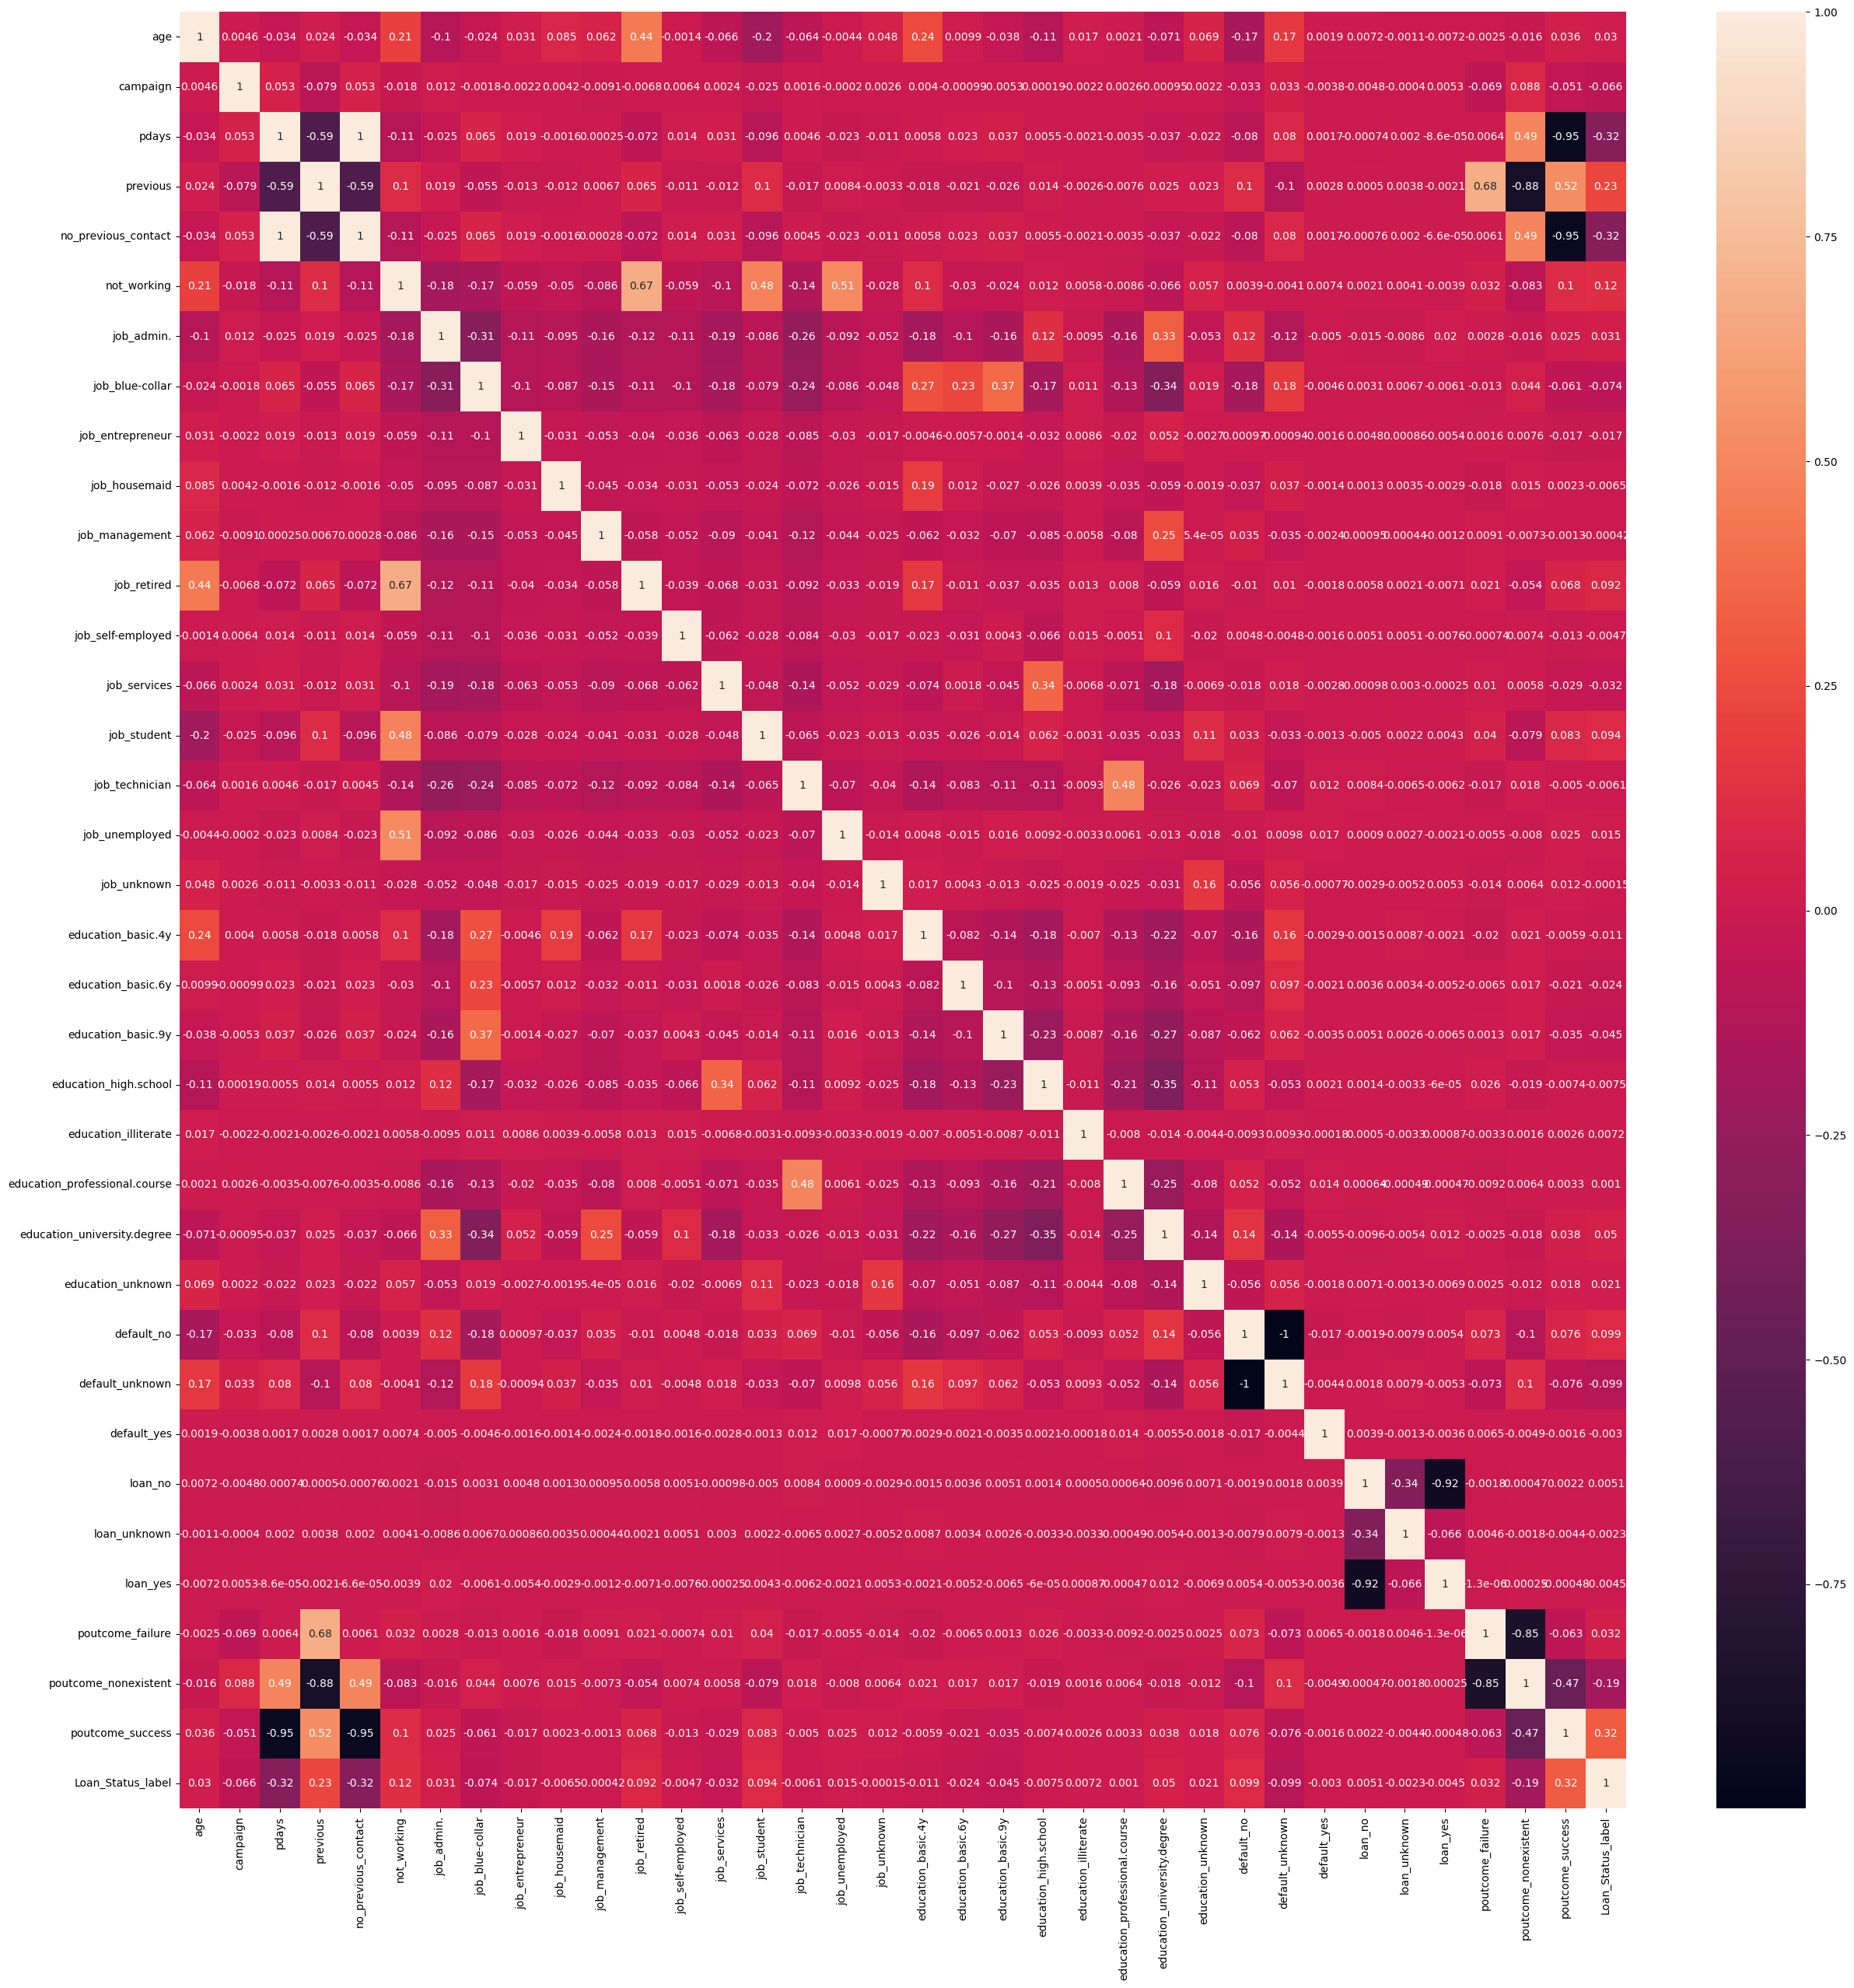

In [87]:
plt.figure(figsize=(30,30))
sb.heatmap(fdata.corr(),annot=True)

- fdata is the final dataframe after dropping irrelevant columns.

------------------------------------------------------------------------------------------------------------------------------------------

## Resampling and Splitting of data:

In [35]:
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

import xgboost
from xgboost import XGBClassifier

In [36]:
import warnings
warnings.filterwarnings('ignore')

- This is done to ignore any unwanted, unnecesarry warnings.

In [37]:
fdata.head()

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,default_no,default_unknown,default_yes,loan_no,loan_unknown,loan_yes,poutcome_failure,poutcome_nonexistent,poutcome_success,Loan_Status_label
0,56,1,999,0,1,0,0,0,0,1,...,1,0,0,1,0,0,0,1,0,0
1,57,1,999,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
2,37,1,999,0,1,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
3,40,1,999,0,1,0,1,0,0,0,...,1,0,0,1,0,0,0,1,0,0
4,56,1,999,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [38]:
fdata.columns

Index(['age', 'campaign', 'pdays', 'previous', 'no_previous_contact',
       'not_working', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'loan_no', 'loan_unknown', 'loan_yes', 'poutcome_failure',
       'poutcome_nonexistent', 'poutcome_success', 'Loan_Status_label'],
      dtype='object')

In [39]:
X = fdata.drop('Loan_Status_label', axis=1) #Independent data
y = fdata['Loan_Status_label'] #Dependent data

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- This splits the data into training and testing data.

In [41]:
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [42]:
print("Distribution of training data:", pd.Series(y_train).value_counts())

Distribution of training data: Loan_Status_label
0    29245
1     3705
Name: count, dtype: int64


- Thus we understand that this data is heavily unbalanced. We need to use resampling techniques here.

In [43]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
under = RandomUnderSampler(sampling_strategy='auto', random_state=42)
pipeline = Pipeline(steps=[('o', smote), ('u', under)])
X_resampled, y_resampled = pipeline.fit_resample(X_train, y_train)

- Here I have used the upsampling technique: SMOTE which was more effective than downsampling aand I got a better result using it.

In [44]:
print("Resampled target distribution:", pd.Series(y_resampled).value_counts())

Resampled target distribution: Loan_Status_label
0    29245
1    29245
Name: count, dtype: int64


In [45]:
print("Resampled target distribution:", pd.Series(y_test).value_counts())

Resampled target distribution: Loan_Status_label
0    7303
1     935
Name: count, dtype: int64


- So this is how I have resampled the data so that we can get balanced data and a better accuracy through our models.

------------------------------------------------------------------------------------------------------------------------------------------

## Model Building:

### 1. Logistic Regression

In [46]:
model_logistic = LogisticRegression()
model_logistic.fit(X_resampled,y_resampled)

LogisticRegression()

In [47]:
y_resampled_pred = model_logistic.predict(X_resampled)

In [48]:
confusion_matrix(y_resampled,y_resampled_pred)

array([[24345,  4900],
       [ 7841, 21404]])

In [49]:
model_logistic.score(X_resampled,y_resampled)

0.7821678919473414

In [50]:
model_logistic.score(X_test,y_test)

0.787205632435057

In [51]:
print("Training Accuracy:",model_logistic.score(X_resampled,y_resampled)*100,"%")

Training Accuracy: 78.21678919473413 %


In [52]:
print("Test Accuracy:",model_logistic.score(X_test,y_test)*100,"%")

Test Accuracy: 78.72056324350571 %


- This data seems pretty accurate and the training and test accuracies are also almost equal, so our model is good.

In [53]:
print(classification_report(y_resampled,y_resampled_pred))

              precision    recall  f1-score   support

           0       0.76      0.83      0.79     29245
           1       0.81      0.73      0.77     29245

    accuracy                           0.78     58490
   macro avg       0.79      0.78      0.78     58490
weighted avg       0.79      0.78      0.78     58490



### 2. Decision Tree

In [54]:
model_DT = DecisionTreeClassifier()
model_DT.fit(X_resampled,y_resampled)

DecisionTreeClassifier()

In [55]:
y_resampled_pred = model_DT.predict(X_resampled)

In [56]:
confusion_matrix(y_resampled,y_resampled_pred)

array([[25598,  3647],
       [ 2772, 26473]])

In [57]:
print("Training Accuracy:",model_DT.score(X_resampled,y_resampled)*100,"%")

Training Accuracy: 89.02547444007523 %


In [58]:
print("Test Accuracy:",model_DT.score(X_test,y_test)*100,"%")

Test Accuracy: 75.89220684632193 %


- So we can observe an overfitting model because the training accuracy is very good but the test accuracy is much less than the training accuracy.
- So, now I am going to set the tree depth to different values till I do not get an overfitting model.

In [59]:
model_DT = DecisionTreeClassifier(max_depth=14)
model_DT.fit(X_resampled,y_resampled)

DecisionTreeClassifier(max_depth=14)

In [60]:
y_resampled_pred = model_DT.predict(X_resampled)

In [61]:
confusion_matrix(y_resampled,y_resampled_pred)

array([[22279,  6966],
       [ 6943, 22302]])

In [62]:
print("Training Accuracy:",model_DT.score(X_resampled,y_resampled)*100,"%")

Training Accuracy: 76.21986664387074 %


In [63]:
print("Test Accuracy:",model_DT.score(X_test,y_test)*100,"%")

Test Accuracy: 72.34765719834911 %


- After this point of max-depth=14, the training accuracy keeps improving but the test accuracy remains almost constant, so this is the best accuracy we get from this model.
- Now I will try to adjust the model by changing its criterion to entropy instead of gini.

In [64]:
model_DT = DecisionTreeClassifier(max_depth=15,criterion='entropy')
model_DT.fit(X_resampled,y_resampled)

DecisionTreeClassifier(criterion='entropy', max_depth=15)

In [65]:
y_resampled_pred = model_DT.predict(X_resampled)

In [66]:
confusion_matrix(y_resampled,y_resampled_pred)

array([[22864,  6381],
       [ 6690, 22555]])

In [67]:
print("Training Accuracy:",model_DT.score(X_resampled,y_resampled)*100,"%")

Training Accuracy: 77.65259018635663 %


In [68]:
print("Test Accuracy:",model_DT.score(X_test,y_test)*100,"%")

Test Accuracy: 73.3187666909444 %


- This is the best accuracy without overfitting that we get using entropy. Just a slight improvement from gini.

In [69]:
print(classification_report(y_resampled,y_resampled_pred))

              precision    recall  f1-score   support

           0       0.77      0.78      0.78     29245
           1       0.78      0.77      0.78     29245

    accuracy                           0.78     58490
   macro avg       0.78      0.78      0.78     58490
weighted avg       0.78      0.78      0.78     58490



### 3. Random Forest

In [70]:
model_Forest = RandomForestClassifier()
model_Forest.fit(X_resampled,y_resampled)

RandomForestClassifier()

In [71]:
y_resampled_pred = model_Forest.predict(X_resampled)

In [72]:
confusion_matrix(y_resampled,y_resampled_pred)

array([[25419,  3826],
       [ 2595, 26650]])

In [73]:
print("Training Accuracy:",model_Forest.score(X_resampled,y_resampled)*100,"%")

Training Accuracy: 89.02205505214566 %


In [74]:
print("Test Accuracy:",model_Forest.score(X_test,y_test)*100,"%")

Test Accuracy: 77.33673221655741 %


- Here also we can observe overfitting and we need to adjust some of the parameters of the model to avoid overfitting.

In [75]:
model_Forest = RandomForestClassifier(max_depth=16,random_state=42)
model_Forest.fit(X_resampled,y_resampled)

RandomForestClassifier(max_depth=16, random_state=42)

In [76]:
y_resampled_pred = model_Forest.predict(X_resampled)

In [77]:
confusion_matrix(y_resampled,y_resampled_pred)

array([[24871,  4374],
       [ 5479, 23766]])

In [78]:
print("Training Accuracy:",model_Forest.score(X_resampled,y_resampled)*100,"%")

Training Accuracy: 83.15438536501965 %


In [79]:
print("Test Accuracy:",model_Forest.score(X_test,y_test)*100,"%")

Test Accuracy: 78.82981306142267 %


- So, this is the best accuracy we get in random forest without overfitting.

In [80]:
print(classification_report(y_resampled,y_resampled_pred))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83     29245
           1       0.84      0.81      0.83     29245

    accuracy                           0.83     58490
   macro avg       0.83      0.83      0.83     58490
weighted avg       0.83      0.83      0.83     58490



### 4. XGBoost

In [88]:
model_xgb = XGBClassifier()
model_xgb.fit(X_resampled,y_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [90]:
y_resampled_pred = model_xgb.predict(X_resampled)

In [91]:
confusion_matrix(y_resampled,y_resampled_pred)

array([[25608,  3637],
       [ 5863, 23382]])

In [93]:
print("Training Accuracy:",model_xgb.score(X_resampled,y_resampled)*100,"%")

Training Accuracy: 83.75790733458712 %


In [94]:
print("Test Accuracy:",model_xgb.score(X_test,y_test)*100,"%")

Test Accuracy: 81.50036416605973 %


In [95]:
print(classification_report(y_resampled,y_resampled_pred))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84     29245
           1       0.87      0.80      0.83     29245

    accuracy                           0.84     58490
   macro avg       0.84      0.84      0.84     58490
weighted avg       0.84      0.84      0.84     58490



- It is giving a decent accuracy score without overfitting.
- Still I will try using different hyperparameters.

<Axes: >

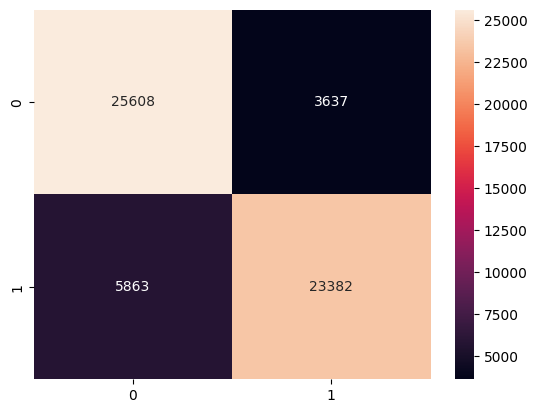

In [100]:
sb.heatmap(confusion_matrix(y_resampled,y_resampled_pred), annot=True,fmt='4')

- This is the heatmap for the prediction on training data.

<Axes: >

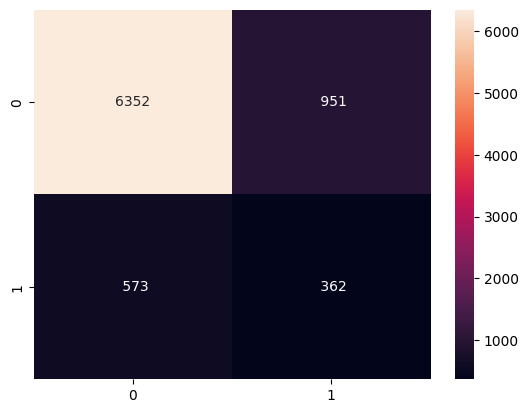

In [101]:
sb.heatmap(confusion_matrix(y_test,model_xgb.predict(X_test)), annot=True,fmt='4')

- This is the heatmap of test data prediction and we can see that the model has a bad accuracy in the prediction of '1'.

Trying with different hyperparameters:

In [103]:
parameters ={
    'n_estimators':[100,200],
    'learning_rate' : [0.01,0.05],
    'max_depth' : [7,8,9,10,11,12,13,14,15],
    'gamma' : [0.2,0.3],
    'reg_lambda' : [0.1,1],
    'reg_alpha' : [0.1,1]
}

In [104]:
gridsearch = GridSearchCV(estimator=model_xgb,param_grid=parameters,scoring='accuracy', cv=5,verbose=3,n_jobs=1)
gridsearch.fit(X_resampled,y_resampled)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[CV 1/5] END gamma=0.2, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=0.1;, score=0.715 total time=   0.3s
[CV 2/5] END gamma=0.2, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=0.1;, score=0.701 total time=   0.3s
[CV 3/5] END gamma=0.2, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=0.1;, score=0.715 total time=   0.3s
[CV 4/5] END gamma=0.2, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=0.1;, score=0.708 total time=   0.3s
[CV 5/5] END gamma=0.2, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=0.1;, score=0.722 total time=   0.3s
[CV 1/5] END gamma=0.2, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=1;, score=0.716 total time=   0.2s
[CV 2/5] END gamma=0.2, learning_rate=0.01, max_depth=7, n_estimators=100, reg_alpha=0.1, reg_lambda=1;, score

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=1,
             param_grid={'gamma': [0.2, 0.3], 'learning_rate': [0.01, 0.05],
                         'max_depth': [7, 8, 9, 10, 11, 12, 13, 14, 15],
                         'n_estimators': [100, 200], 'reg_alpha': [0.1, 1],
                         'reg_lambda': [0.1, 1]},
             scoring='accuracy', verbose=3)

In [105]:
print("Best Parameters:",gridsearch.best_params_)

Best Parameters: {'gamma': 0.2, 'learning_rate': 0.05, 'max_depth': 15, 'n_estimators': 200, 'reg_alpha': 1, 'reg_lambda': 0.1}


In [106]:
print("Best Estimator:",gridsearch.best_estimator_)

Best Estimator: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


In [108]:
model_xgb=XGBClassifier(gamma= 0.2, learning_rate =0.05, max_depth =15, n_estimators= 200, reg_alpha= 1, reg_lambda= 0.1)
model_xgb.fit(X_resampled,y_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [109]:
y_resampled_pred = model_xgb.predict(X_resampled)

In [110]:
confusion_matrix(y_resampled,y_resampled_pred)

array([[25625,  3620],
       [ 3994, 25251]])

In [111]:
print("Training Accuracy:",model_xgb.score(X_resampled,y_resampled)*100,"%")

Training Accuracy: 86.98239015216276 %


In [112]:
print("Test Accuracy:",model_xgb.score(X_test,y_test)*100,"%")

Test Accuracy: 79.86161689730518 %


- Here the training and test accuracy seem close enough to say that this is not an overfiitting model.
- Also we observe a decent accuracy of close to 80% here.

------------------------------------------------------------------------------------------------------------------------------------------

So, in this project I have successfully built many machine learning models to predict whether a client's loan should be approved or not by analysing the data and removing the insignificant data, then resampling the data because it was really unbalanced and then building models.

- The best accuracy observed here was from XGBoost where we observed a training accuracy of 86% and test accuracy of 80%
- Also, Logistic regression gave a very decent accuracy with both training and test accuracies to be 78%
- The other models also gave accuracies in the range of 75 - 80%

------------------------------------------------------------------------------------------------------------------------------------------